# Varying payload sizes plotting scripts

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
from numpy import percentile

In [6]:
ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"
data_file = f"{ROOT}/data/Apr06/c4large/varyp"
Protocols = ["synchs","apollo","optsync"]
Payloads = [0,128,1024]
Markers = {
    "synchs": "+",
    "apollo": "o",
    "optsync": "x",
}
Name = {
    "synchs": "Sync HotStuff",
    "apollo": "Apollo",
    "optsync": "Opt Sync"
}

In [7]:
data = {}
for p in Protocols:
    data[p] = {}

# Process the given log_file
def process_log_file(log_file:str, log_data={"w":[],"tput":[],"lat":[]}):
    with open(log_file, "r") as f:
        for line in f.readlines():
            if line.count("DP[Window]: ") > 0:
                window = int(line.split("DP[Window]: ")[1].strip())
                log_data["w"].append(window/1000)
            if line.count("DP[Throughput]: ") > 0:
                tput = float(line.split("DP[Throughput]: ")[1].strip())
                log_data["tput"].append(tput/1000)
            if line.count("DP[Latency]: ") > 0:
                lat = float(line.split("DP[Latency]: ")[1].strip())
                log_data["lat"].append(lat)

# Function to add data to the dictionary
def add_data(Protocol:str, Payload:int, in_data={}):
    # Reset stale data
    if Protocol not in in_data.keys():
        in_data[Protocol] = {}
    # Overwrite whatever stale blocksize data was there, with a new one
    in_data[Protocol][Payload] = {
        "w": [],
        "tput": [],
        "lat": []
    }
    # Process the file
    log_file = f"{data_file}/p{Payload}-{Protocol}-run.log"
    log_data = process_log_file(log_file, in_data[Protocol][Payload])

for p in Protocols:
    for pl in Payloads:
        add_data(p,pl,data)

# print(data["synchs"])

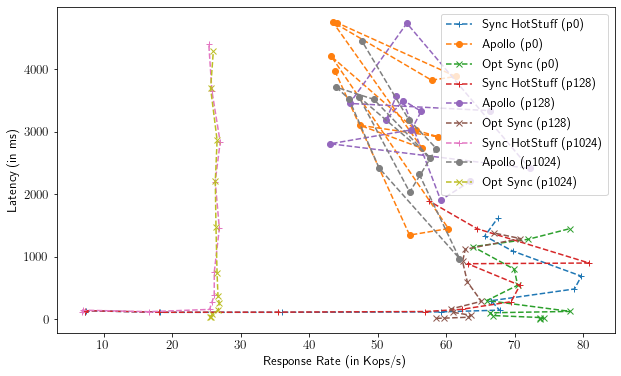

In [9]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(10, 6)
plt.rcParams.update({'font.size': 13})

for pl in Payloads:
    for p in Protocols:
        plt.plot(data[p][pl]["tput"],data[p][pl]["lat"],label=f"{Name[p]} (p{pl})", linestyle='--', marker=Markers[p])

plt.legend()
plt.xlabel("Response Rate (in Kops/s)")
plt.ylabel("Latency (in ms)")

plt.show()
# plt.savefig("Tput-vs-latency-for-diff-p.pdf", bbox_inches="tight")

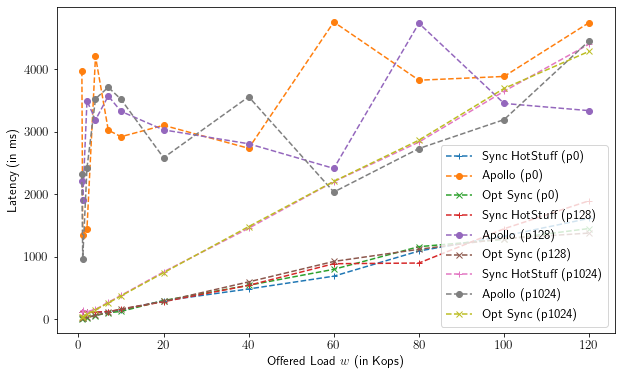

In [12]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(10, 6)
plt.rcParams.update({'font.size': 13})

for pl in Payloads:
    for p in Protocols:
        plt.plot(data[p][pl]["w"],data[p][pl]["lat"],label=f"{Name[p]} (p{pl})", linestyle='--', marker=Markers[p])

plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Latency (in ms)")

plt.show()
# plt.savefig("Latency-vs-w-for-diff-p.pdf", bbox_inches="tight")

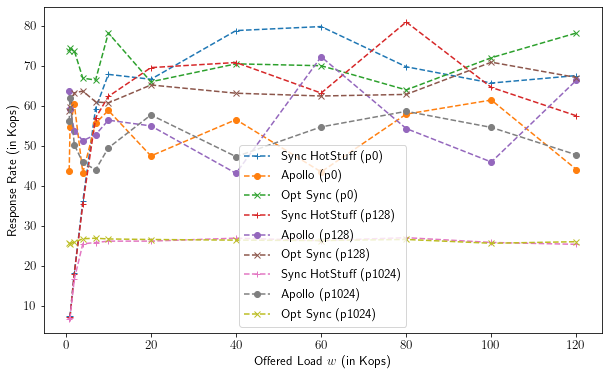

In [13]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(10, 6)
plt.rcParams.update({'font.size': 13})

for pl in Payloads:
    for p in Protocols:
        plt.plot(data[p][pl]["w"],data[p][pl]["tput"],label=f"{Name[p]} (p{pl})", linestyle='--', marker=Markers[p])

plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Response Rate (in Kops)")

plt.show()
# plt.savefig("Tput-vs-w-for-diff-p.pdf", bbox_inches="tight")

In [14]:
%%bash
# Export to the overleaf document
cd "/run/media/haxolotl/Backup/GitRoot/libapollo-rust"
ls

0.log
1.log
2.log
benches
Cargo.lock
Cargo.toml
client.log
cli_ip_file
config
consensus
crypto
data
examples
ip_file
logs.txt
Makefile
net
perf.data
perf.data.old
Plots
scripts
src
target
testdata
TODO.md
tools
types
util
